# ColorPicker

Use lonboard with an ipywidgets [ColorPicker](https://ipywidgets.readthedocs.io/en/stable/examples/Widget%20List.html#color-picker) object.

Example gif:

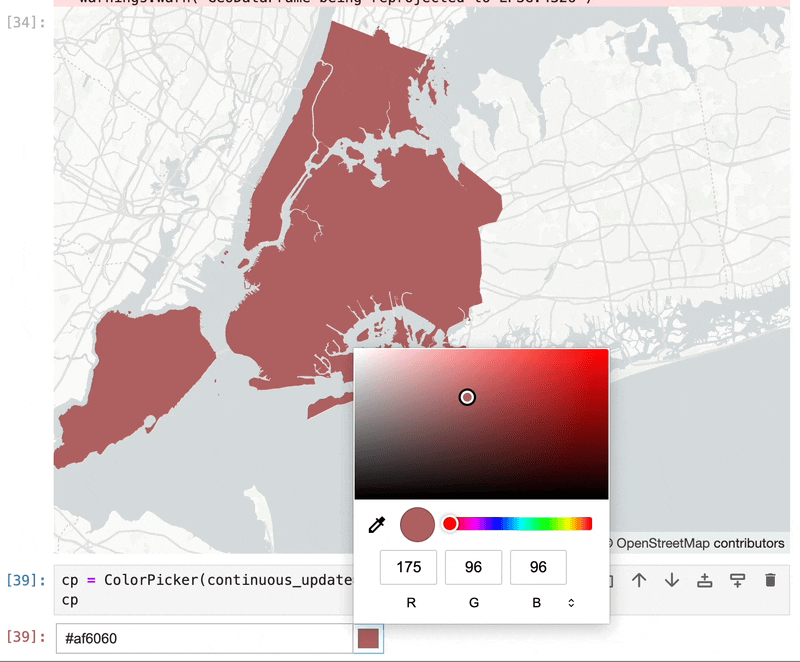

## Dependencies

- lonboard
- [geodatasets](https://github.com/geopandas/geodatasets)

    Run `pip install geodatasets` if needed.

## Imports

In [1]:
import geodatasets
import geopandas as gpd
import ipywidgets

from lonboard import Map, SolidPolygonLayer

`geodatasets.get_path` will download the dataset if it hasn't been downloaded and cached before.

In [2]:
gdf = gpd.read_file(geodatasets.get_path("nybb"))

Create our basic map:

In [3]:
layer = SolidPolygonLayer.from_geopandas(gdf)
map_ = Map(layers=[layer])
map_

/Users/kyle/github/developmentseed/lonboard/lonboard/_layer.py:99: UserWarning: GeoDataFrame being reprojected to EPSG:4326
  warnings.warn("GeoDataFrame being reprojected to EPSG:4326")


Map(layers=[SolidPolygonLayer(table=pyarrow.Table
BoroCode: int64
BoroName: string
Shape_Leng: double
Shape_Ar…

Create the `ColorPicker` widget:

In [4]:
color_picker = ipywidgets.ColorPicker()
color_picker

ColorPicker(value='black')

Note that the "data" contained by the `color_picker` instance is held by the `value` attribute:

In [5]:
color_picker.value

'black'

We'll now link the two widgets together, so that whenever the color picker is updated, `ipywidgets` will update the value of `get_fill_color` on the layer.

The format of `dlink` is:

- tuple: (source widget, attribute of source widget)
- tuple: (target widget, attribute of target widget)

So we use the below syntax to link `color_picker.value` to `layer.get_fill_color`.

We need to use `dlink`, not `link`, which creates a one-directional link (from the color picker to the layer) and not a bi-directional link. This is because the color picker and the layer have a different color representation under the hood (`ColorPicker` stores a hex string; the `SolidPolygonLayer` works in terms of RGBA color integers).

In [6]:
ipywidgets.dlink(
    (color_picker, "value"),
    (layer, "get_fill_color"),
)

Now click on the color widget and change the color! You need to press <kbd>Enter</kbd> to select a specific color.